## 数据可视化

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib as mpl
import scipy.stats as stats
import numpy as np

In [4]:
train = pd.read_csv('地区温度预测挑战赛公开数据/train.csv')
test = pd.read_csv('地区温度预测挑战赛公开数据/test.csv')
submit = pd.read_csv('地区温度预测挑战赛公开数据/sample_submit.csv')

In [5]:
train

,降水量,气温,湿球空气温度,露点空气温度,蒸气压,相对湿度,平均海平面压力,平均每小时风速,主要每小时风向,地区,站号,年,月,日
0,0.0,1.4,0.8,-0.1,6.2,90.1,1016.3,NaN,NaN,0,0,2016,1,01 00:00:00
1,0.0,1.6,0.8,-0.7,6.0,85.0,1016.3,NaN,NaN,0,0,2016,1,01 01:00:00
2,0.0,-0.2,-0.5,-1.3,5.6,92.2,1016.4,NaN,NaN,0,0,2016,1,01 02:00:00
3,0.0,-0.5,-1.0,-1.3,5.7,95.0,1016.3,NaN,NaN,0,0,2016,1,01 03:00:00
4,0.0,-0.3,-0.5,-1.1,5.8,94.1,1016.2,NaN,NaN,0,0,2016,1,01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244731,0.1,8.9,8.6,8.6,11.2,97.2,1000.9,15.0,290.0,7,23,2021,11,30 19:00:00
1244732,0.5,8.8,8.4,8.1,10.8,96.1,1001.2,19.0,300.0,7,23,2021,11,30 20:00:00
1244733,0.3,7.9,7.5,6.9,10.1,94.2,1002.3,19.0,320.0,7,23,2021,11,30 21:00:00
1244734,0.2,7.3,6.8,6.4,9.8,94.0,1003.6,18.0,310.0,7,23,2021,11,30 22:00:00


In [6]:
train.dtypes

降水量        float64
气温         float64
湿球空气温度     float64
露点空气温度     float64
蒸气压        float64
相对湿度       float64
平均海平面压力    float64
平均每小时风速    float64
主要每小时风向    float64
地区           int64
站号           int64
年            int64
月            int64
日           object
dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244736 entries, 0 to 1244735
Data columns (total 14 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   降水量      1244590 non-null  float64
 1   气温       1244509 non-null  float64
 2   湿球空气温度   1244433 non-null  float64
 3   露点空气温度   1244433 non-null  float64
 4   蒸气压      1244433 non-null  float64
 5   相对湿度     1244512 non-null  float64
 6   平均海平面压力  1244405 non-null  float64
 7   平均每小时风速  1140883 non-null  float64
 8   主要每小时风向  1140851 non-null  float64
 9   地区       1244736 non-null  int64  
 10  站号       1244736 non-null  int64  
 11  年        1244736 non-null  int64  
 12  月        1244736 non-null  int64  
 13  日        1244736 non-null  object 
dtypes: float64(9), int64(4), object(1)
memory usage: 133.0+ MB


In [8]:
display(train.describe())
display(train.describe(include="object"))

,降水量,气温,湿球空气温度,露点空气温度,蒸气压,相对湿度,平均海平面压力,平均每小时风速,主要每小时风向,地区,站号,年,月
count,1.244590e+06,1.244509e+06,1.244433e+06,1.244433e+06,1.244433e+06,1.244512e+06,1.244405e+06,1.140883e+06,1.140851e+06,1.244736e+06,1.244736e+06,1.244736e+06,1.244736e+06
mean,1.260558e-01,1.031931e+01,8.941366e+00,7.454480e+00,1.079686e+01,8.315449e+01,1.013460e+03,9.416619e+00,2.037387e+02,6.208333e+00,1.150000e+01,2.018464e+03,6.443313e+00
std,4.762011e-01,4.769695e+00,4.411332e+00,4.523327e+00,3.239149e+00,1.191142e+01,1.247816e+01,5.776643e+00,8.677642e+01,4.112778e+00,6.922189e+00,1.693743e+00,3.410204e+00
min,0.000000e+00,-7.700000e+00,-4.970000e+01,-1.460000e+01,2.000000e+00,2.000000e+01,9.567000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03,1.000000e+00
25%,0.000000e+00,7.000000e+00,5.900000e+00,4.100000e+00,8.200000e+00,7.610000e+01,1.005900e+03,5.000000e+00,1.400000e+02,3.750000e+00,5.750000e+00,2.017000e+03,3.000000e+00
50%,0.000000e+00,1.040000e+01,9.100000e+00,7.600000e+00,1.050000e+01,8.600000e+01,1.015100e+03,8.000000e+00,2.100000e+02,6.500000e+00,1.150000e+01,2.018000e+03,6.000000e+00
75%,0.000000e+00,1.380000e+01,1.220000e+01,1.080000e+01,1.300000e+01,9.220000e+01,1.022100e+03,1.200000e+01,2.700000e+02,9.250000e+00,1.725000e+01,2.020000e+03,9.000000e+00
max,3.400000e+01,3.160000e+01,2.400000e+01,2.270000e+01,2.730000e+01,1.002000e+02,1.051300e+03,5.900000e+01,3.600000e+02,1.400000e+01,2.300000e+01,2.021000e+03,1.200000e+01


,日
count,1244736
unique,744
top,01 00:00:00
freq,1704


In [11]:
train.isnull().sum()

降水量           146
气温            227
湿球空气温度        303
露点空气温度        303
蒸气压           303
相对湿度          224
平均海平面压力       331
平均每小时风速    103853
主要每小时风向    103885
地区              0
站号              0
年               0
月               0
日               0
dtype: int64

In [12]:
train.head()

,降水量,气温,湿球空气温度,露点空气温度,蒸气压,相对湿度,平均海平面压力,平均每小时风速,主要每小时风向,地区,站号,年,月,日
0,0.0,1.4,0.8,-0.1,6.2,90.1,1016.3,NaN,NaN,0,0,2016,1,01 00:00:00
1,0.0,1.6,0.8,-0.7,6.0,85.0,1016.3,NaN,NaN,0,0,2016,1,01 01:00:00
2,0.0,-0.2,-0.5,-1.3,5.6,92.2,1016.4,NaN,NaN,0,0,2016,1,01 02:00:00
3,0.0,-0.5,-1.0,-1.3,5.7,95.0,1016.3,NaN,NaN,0,0,2016,1,01 03:00:00
4,0.0,-0.3,-0.5,-1.1,5.8,94.1,1016.2,NaN,NaN,0,0,2016,1,01 04:00:00


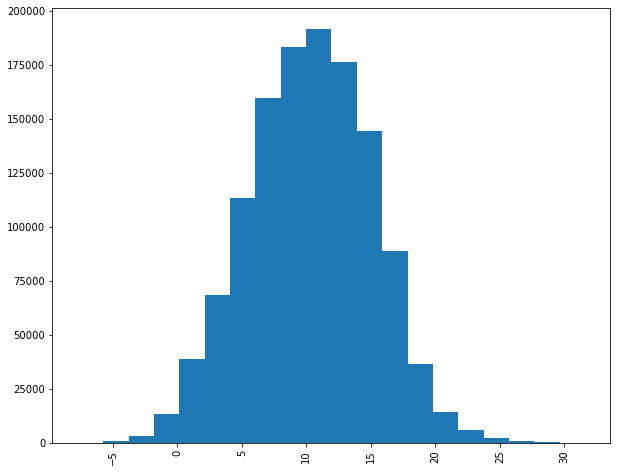

In [20]:
plt.figure(figsize=(10,8))
plt.hist(train["气温"], bins=20)
plt.xticks(rotation=90)
plt.show()

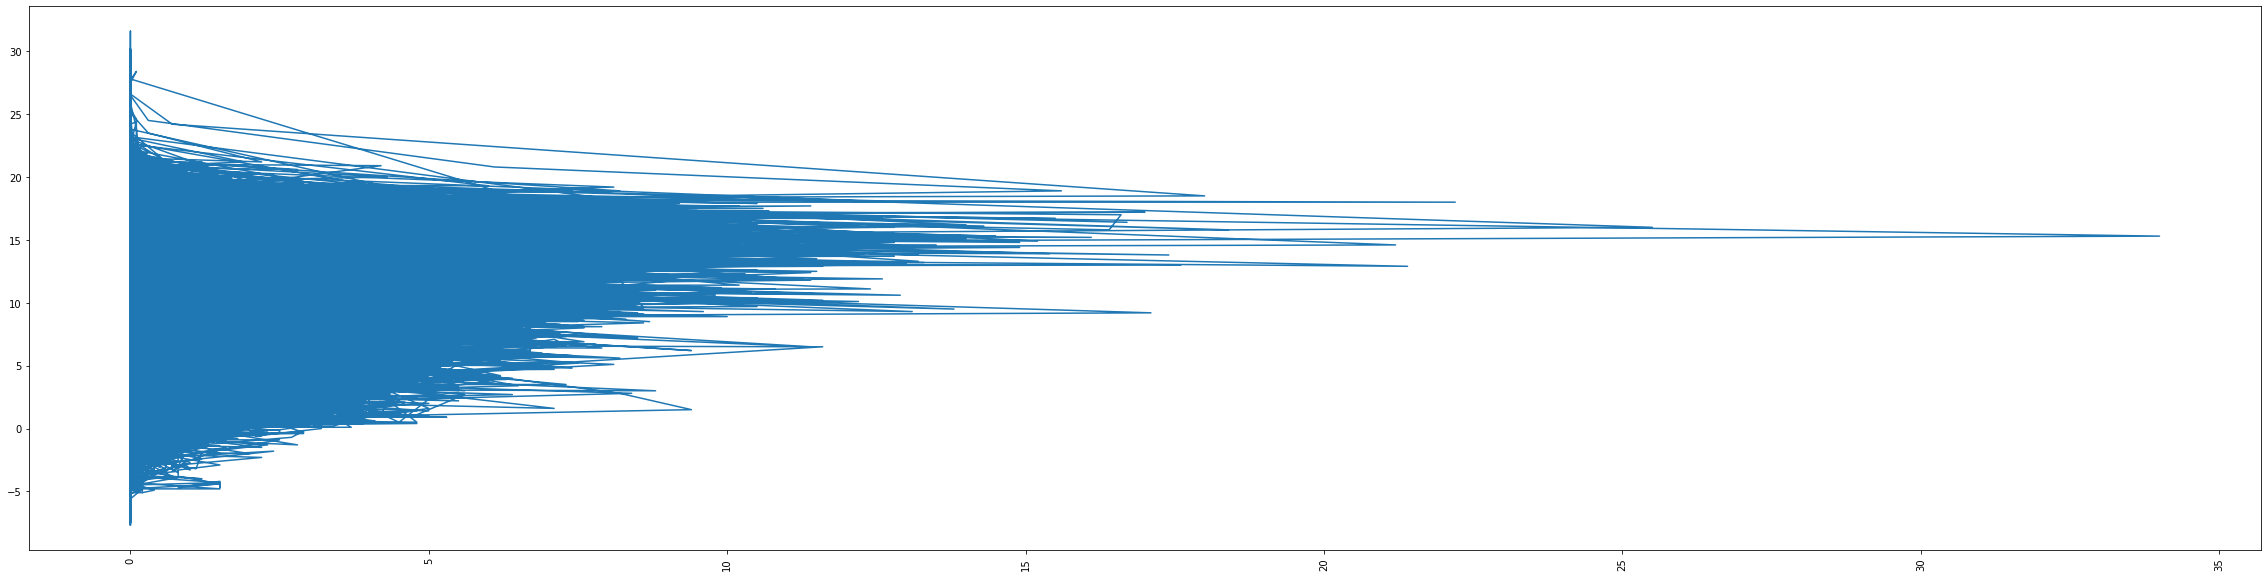

In [9]:
from matplotlib import ticker
plt.figure(figsize=(40,10))
plt.plot(train["降水量"], train["气温"])
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10)) # 标签只显示其中一部分
plt.xticks(rotation=90) # 解决标签重叠问题
plt.show()

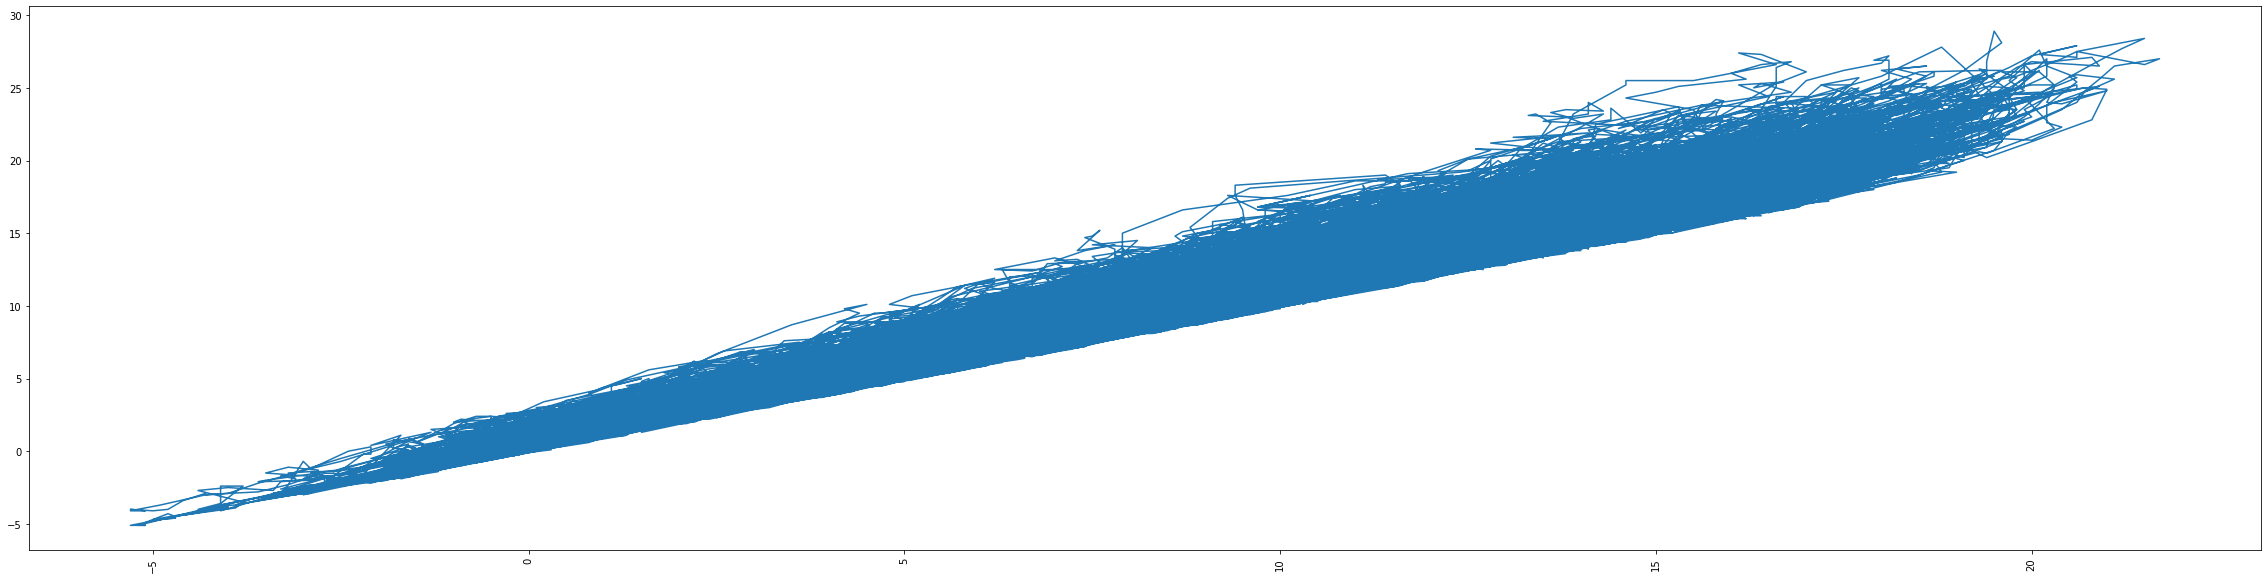

In [70]:
from matplotlib import ticker
plt.figure(figsize=(40,10))
plt.plot(train["湿球空气温度"][:100000], train["气温"][:100000])
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10)) # 标签只显示其中一部分
plt.xticks(rotation=90) # 解决标签重叠问题
plt.show()

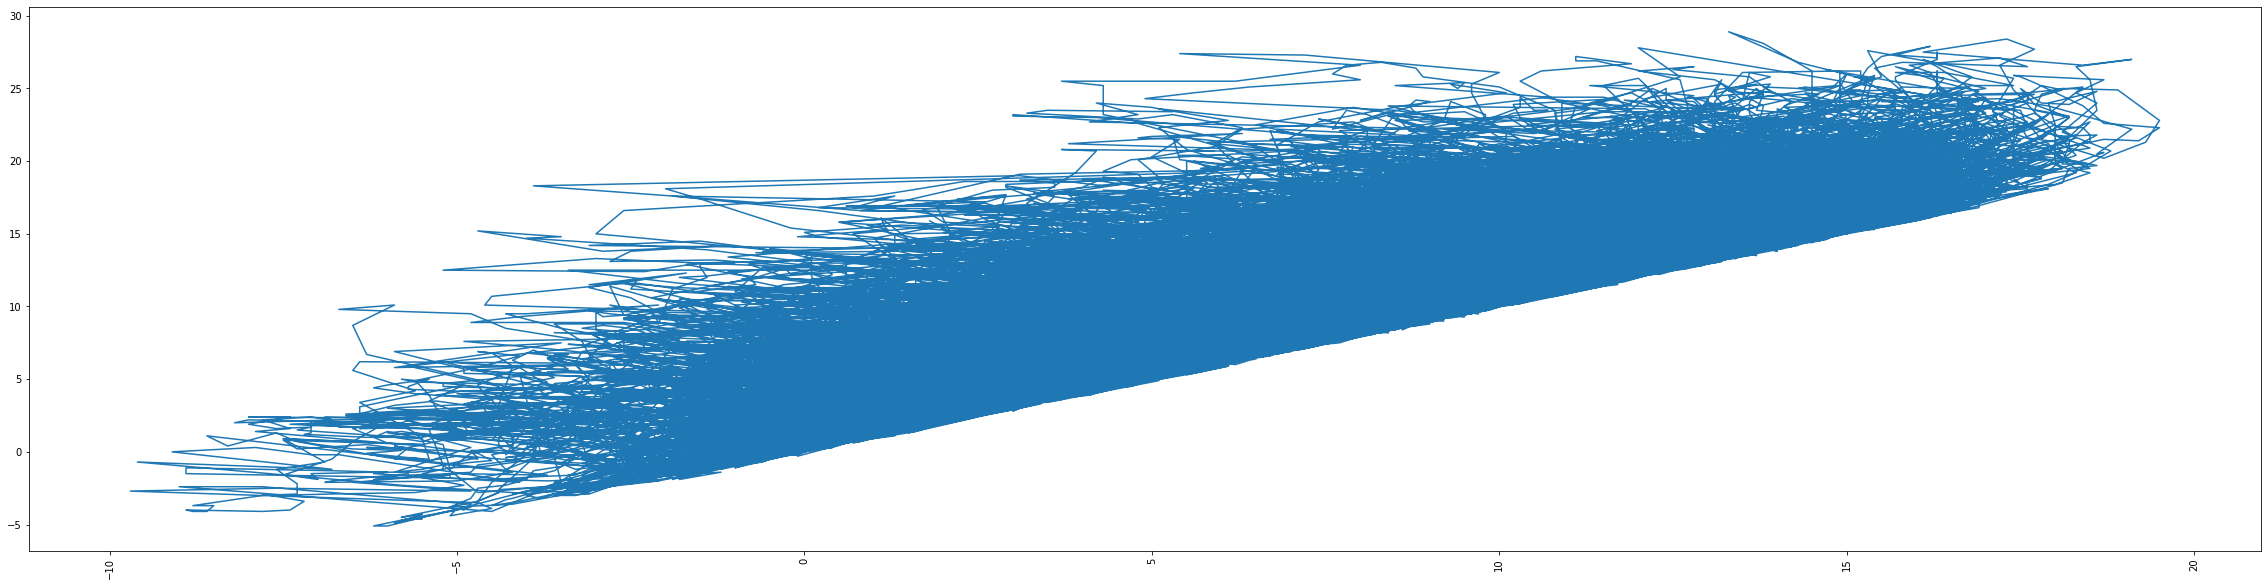

In [72]:
from matplotlib import ticker
plt.figure(figsize=(40,10))
plt.plot(train["露点空气温度"][:100000], train["气温"][:100000])
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10)) # 标签只显示其中一部分
plt.xticks(rotation=90) # 解决标签重叠问题
plt.show()

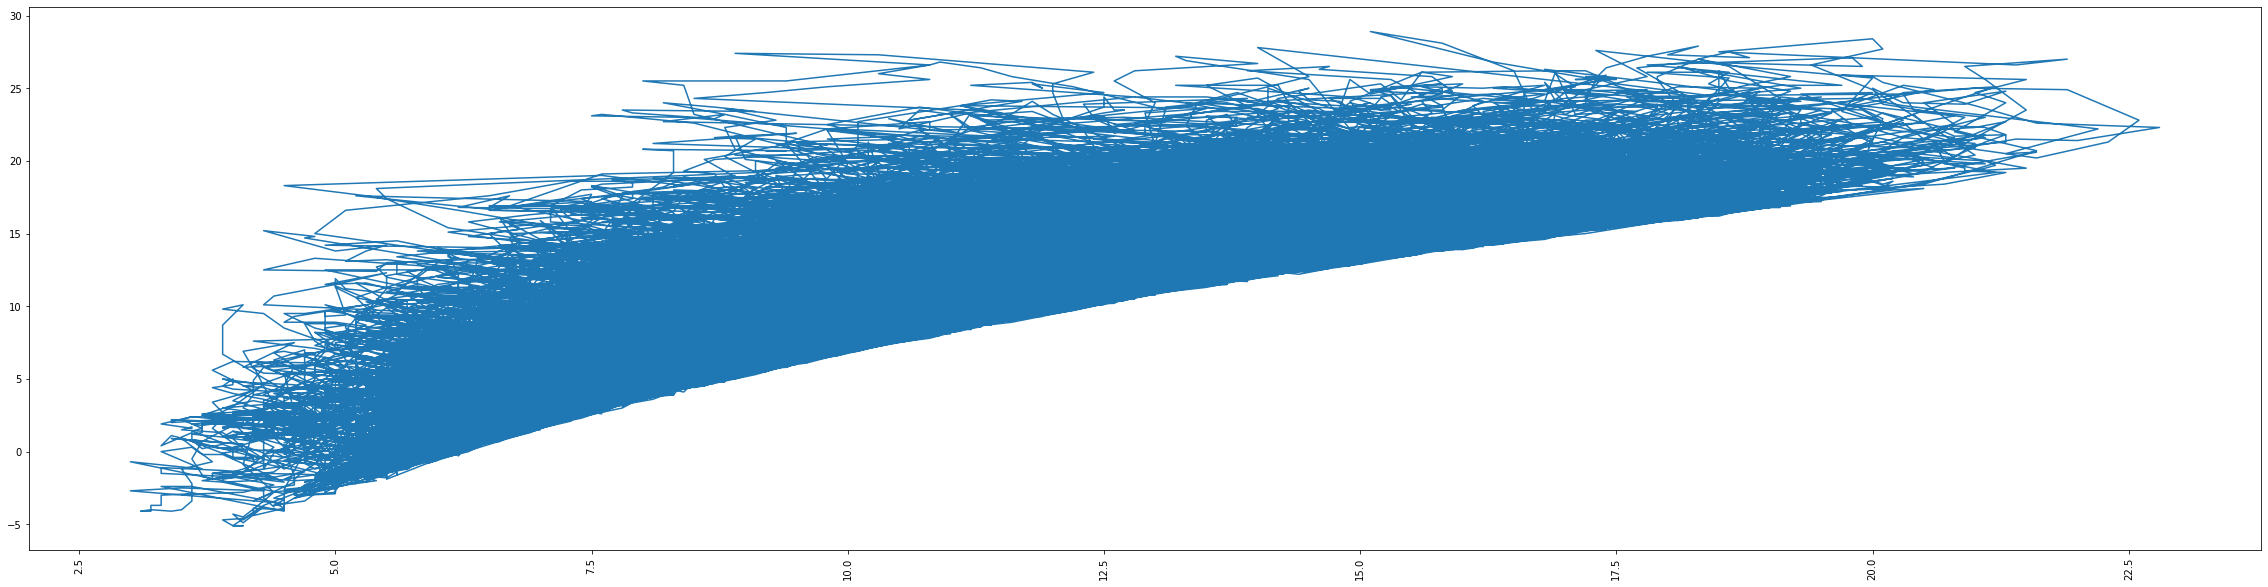

In [73]:
from matplotlib import ticker
plt.figure(figsize=(40,10))
plt.plot(train["蒸气压"][:100000], train["气温"][:100000])
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10)) # 标签只显示其中一部分
plt.xticks(rotation=90) # 解决标签重叠问题
plt.show()

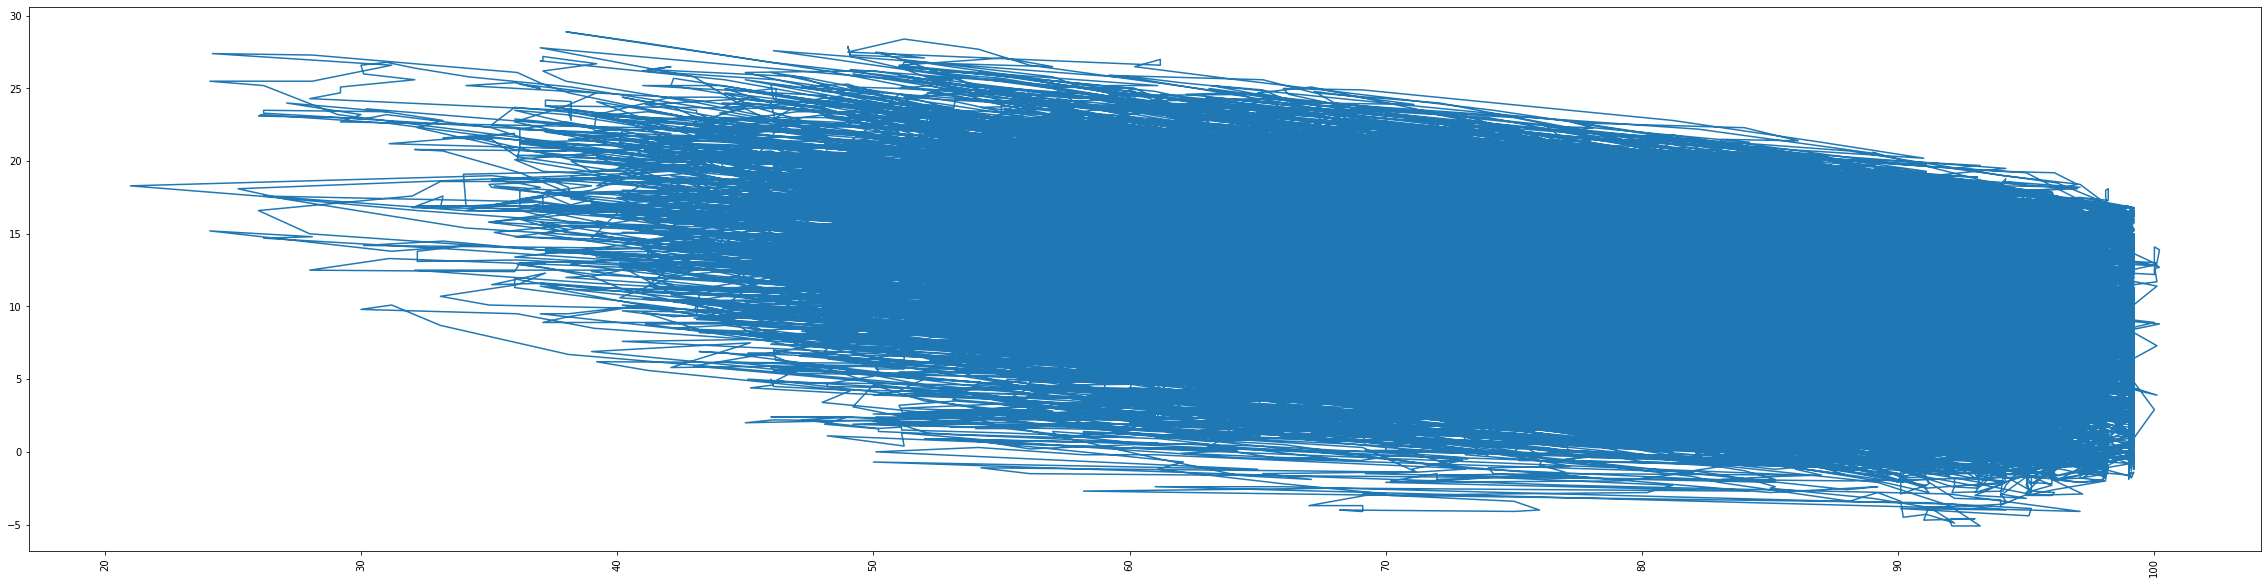

In [74]:
from matplotlib import ticker
plt.figure(figsize=(40,10))
plt.plot(train["相对湿度"][:100000], train["气温"][:100000])
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10)) # 标签只显示其中一部分
plt.xticks(rotation=90) # 解决标签重叠问题
plt.show()

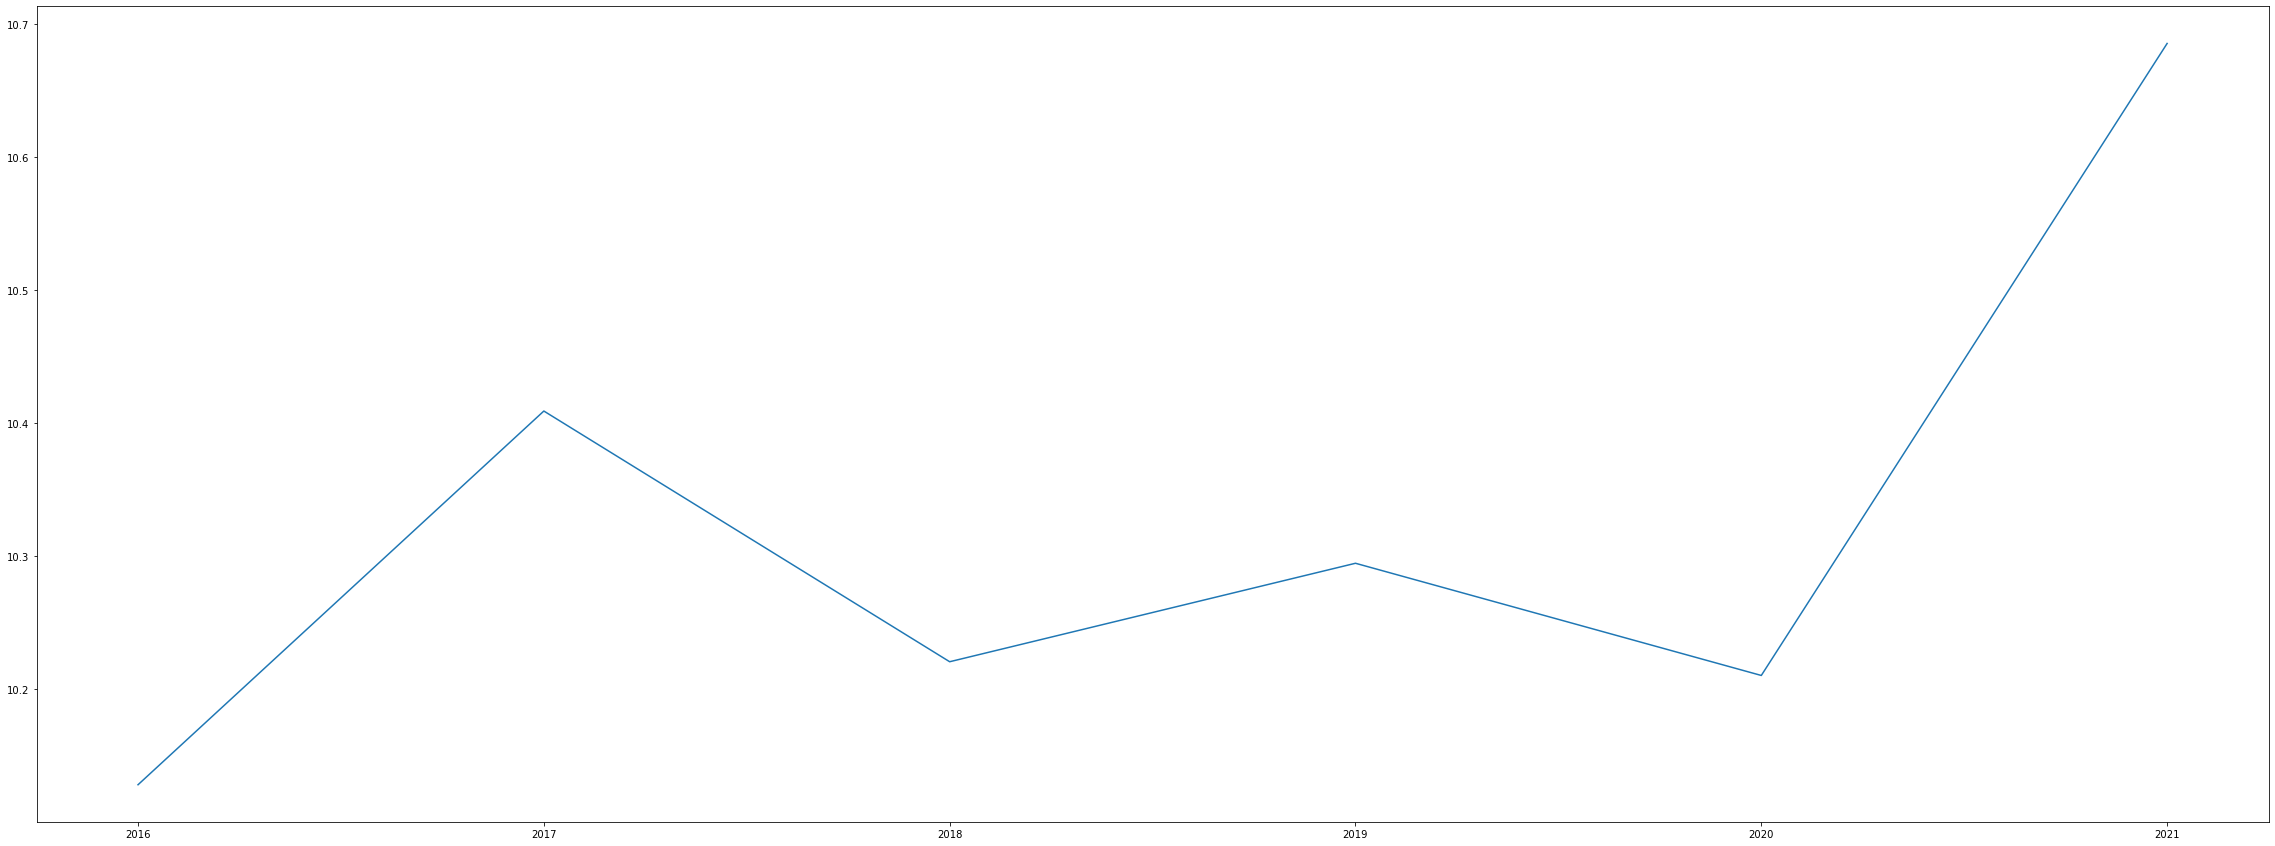

In [10]:
group_train = train.groupby("年", as_index=False).mean().sort_values("年")
plt.figure(figsize=(40,15))
plt.plot(group_train["年"], group_train["气温"])
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10)) # 标签只显示其中一部分
# plt.xticks(rotation=90) # 解决标签重叠问题
plt.show()

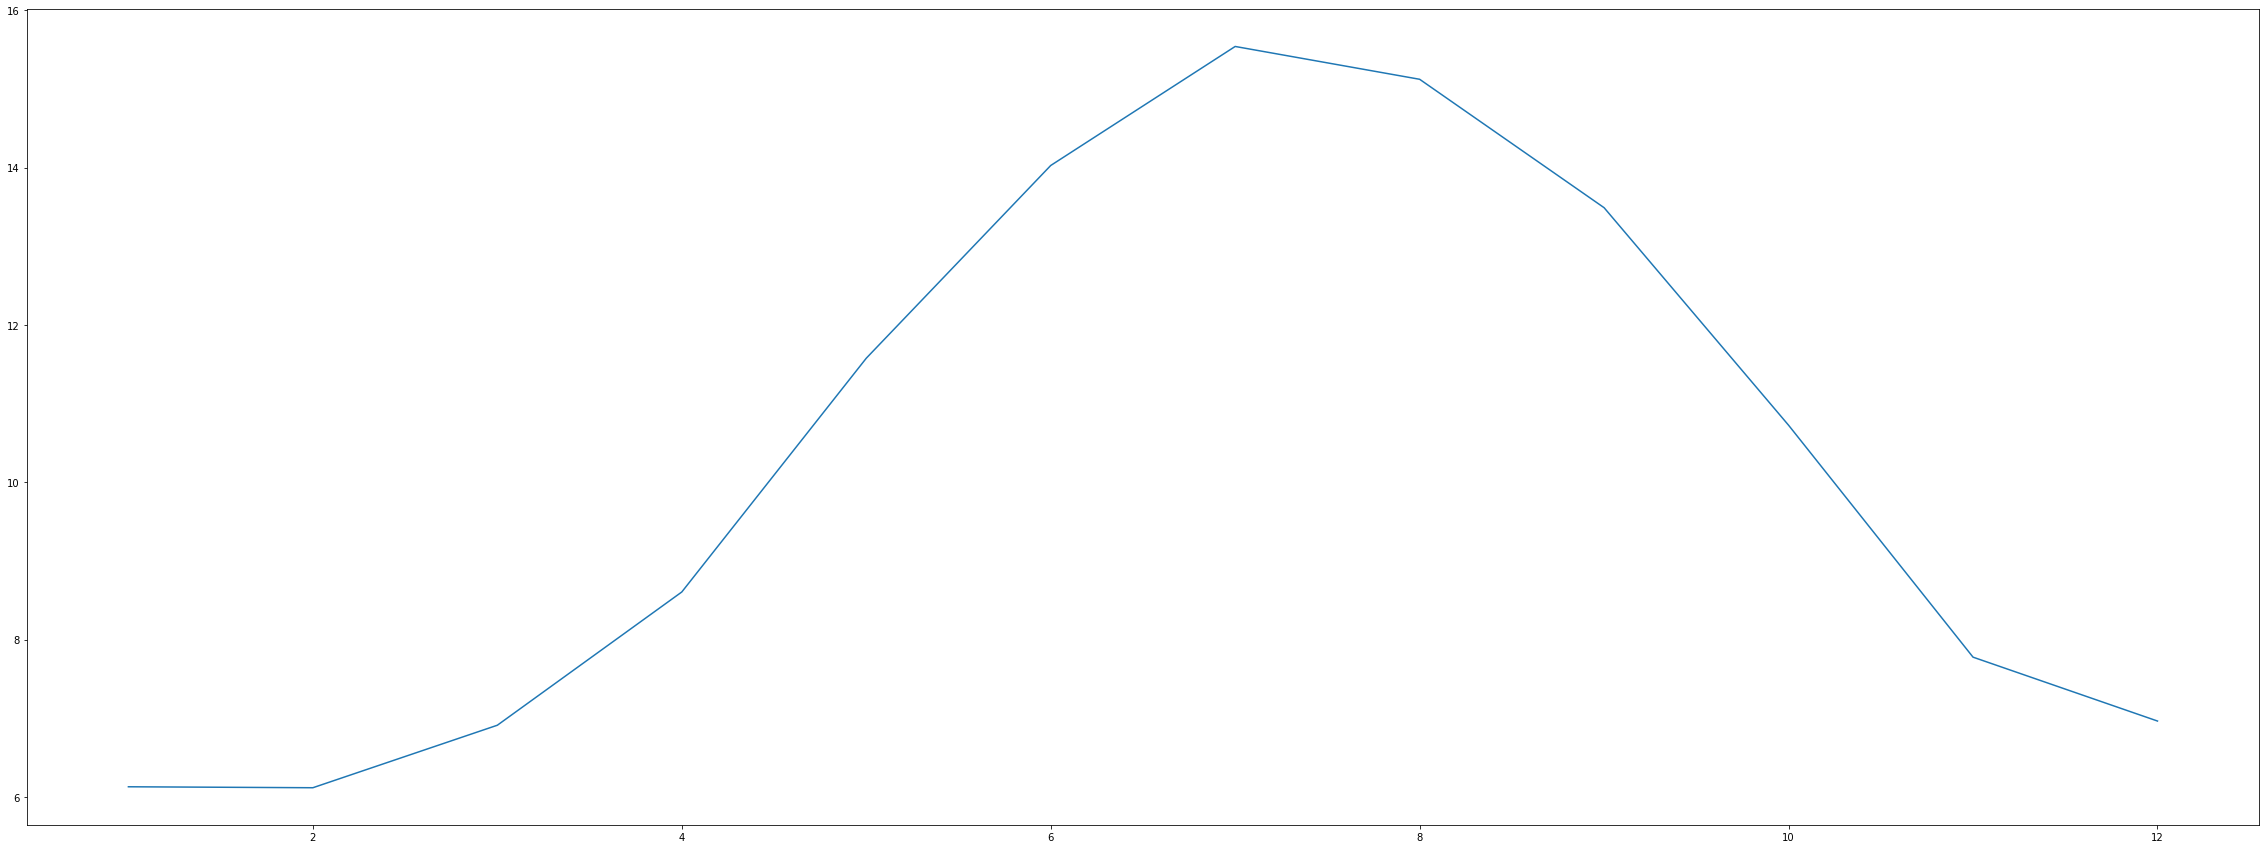

In [11]:
group_train = train.groupby("月", as_index=False).mean().sort_values("月")
plt.figure(figsize=(40,15))
plt.plot(group_train["月"], group_train["气温"])
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10)) # 标签只显示其中一部分
# plt.xticks(rotation=90) # 解决标签重叠问题
plt.show()

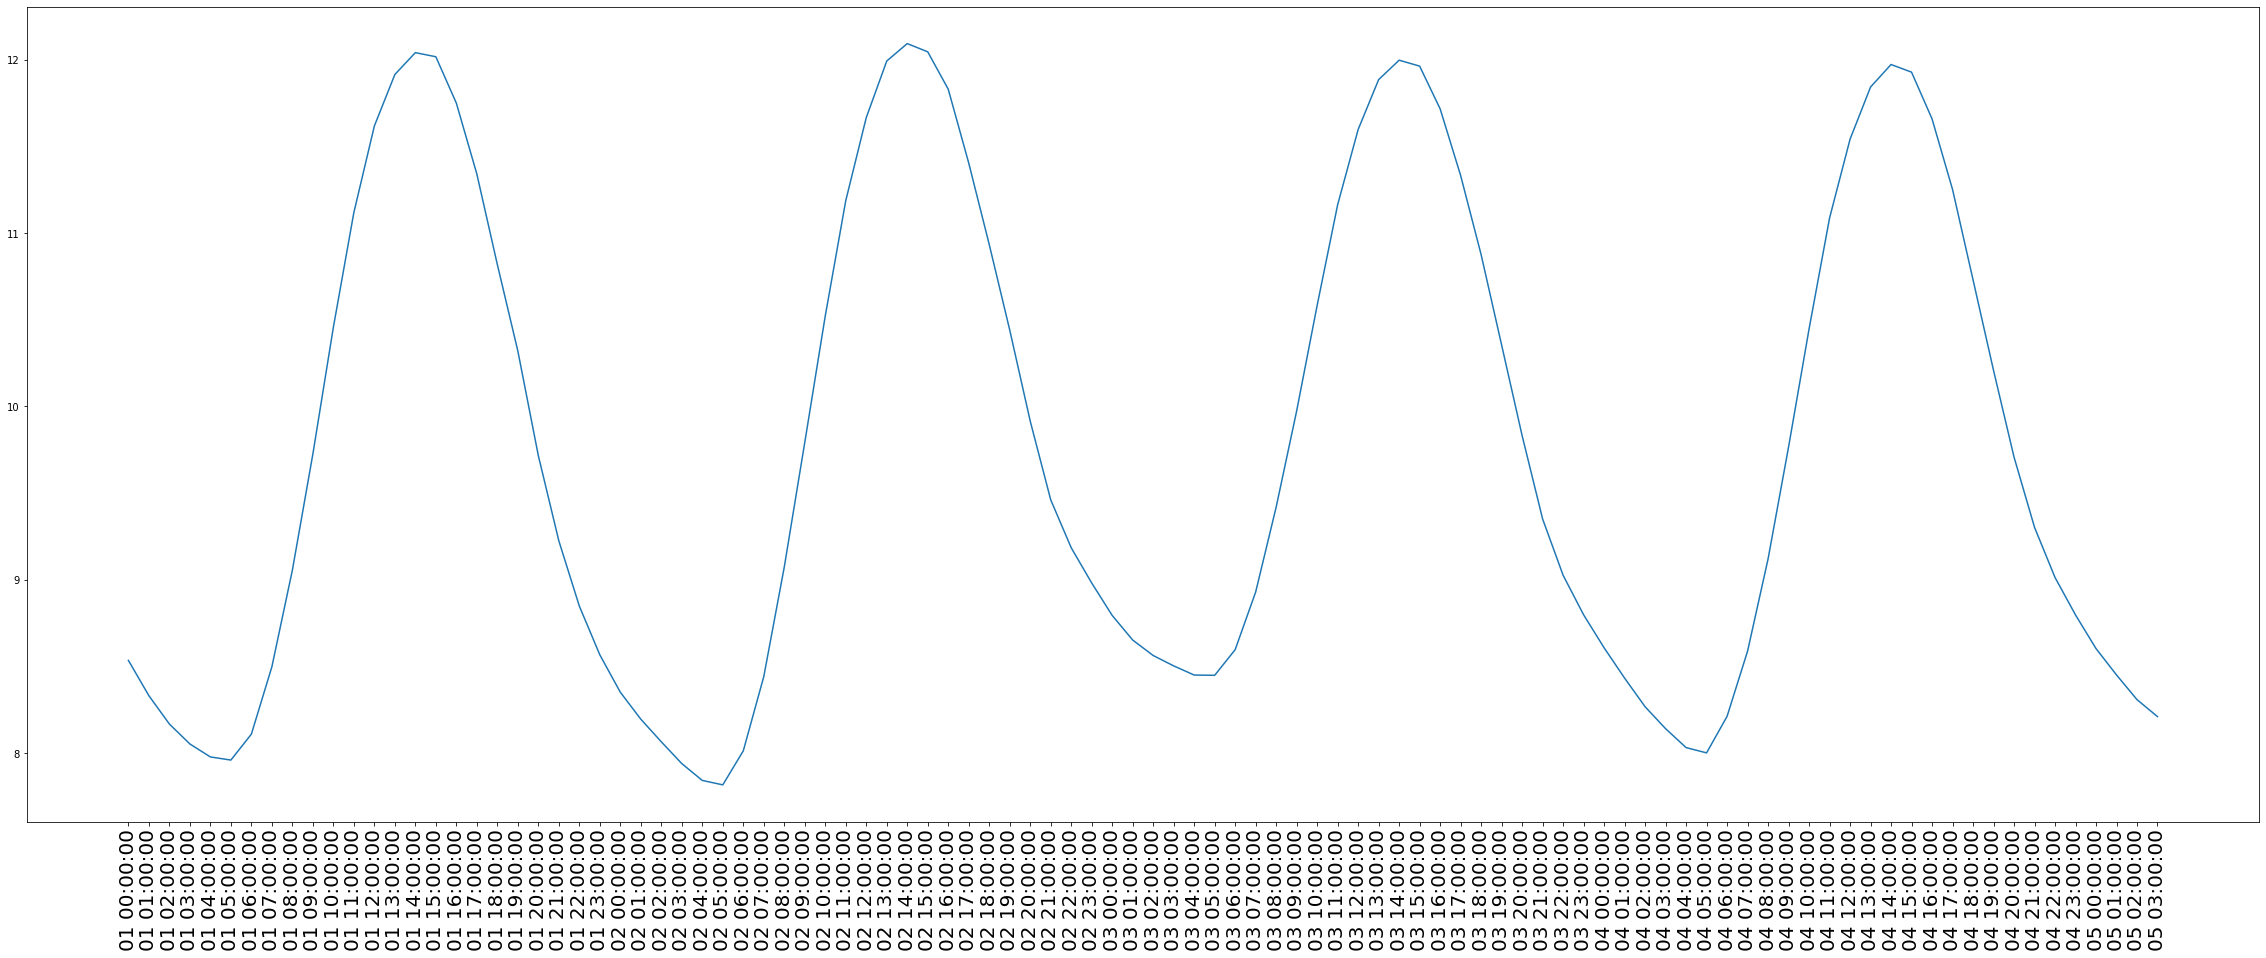

In [18]:
group_train = train.groupby("日", as_index=False).mean().sort_values("日")
plt.figure(figsize=(40,15))
plt.plot(group_train["日"][:100], group_train["气温"][:100])
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10)) # 标签只显示其中一部分
plt.xticks(rotation=90, fontsize=20) # 解决标签重叠问题
plt.show()

In [51]:
train.dtypes

降水量        float64
气温         float64
湿球空气温度     float64
露点空气温度     float64
蒸气压        float64
相对湿度       float64
平均海平面压力    float64
平均每小时风速    float64
主要每小时风向    float64
地区           int64
站号           int64
年            int64
月            int64
日           object
时间          object
dtype: object

周期性趋势，从前一天五六点到后一天五六点为一个周期

### 查看异常值

### 箱线图

D:\software\anaconda2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\software\anaconda2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\software\anaconda2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\software\anaconda2022\lib\si

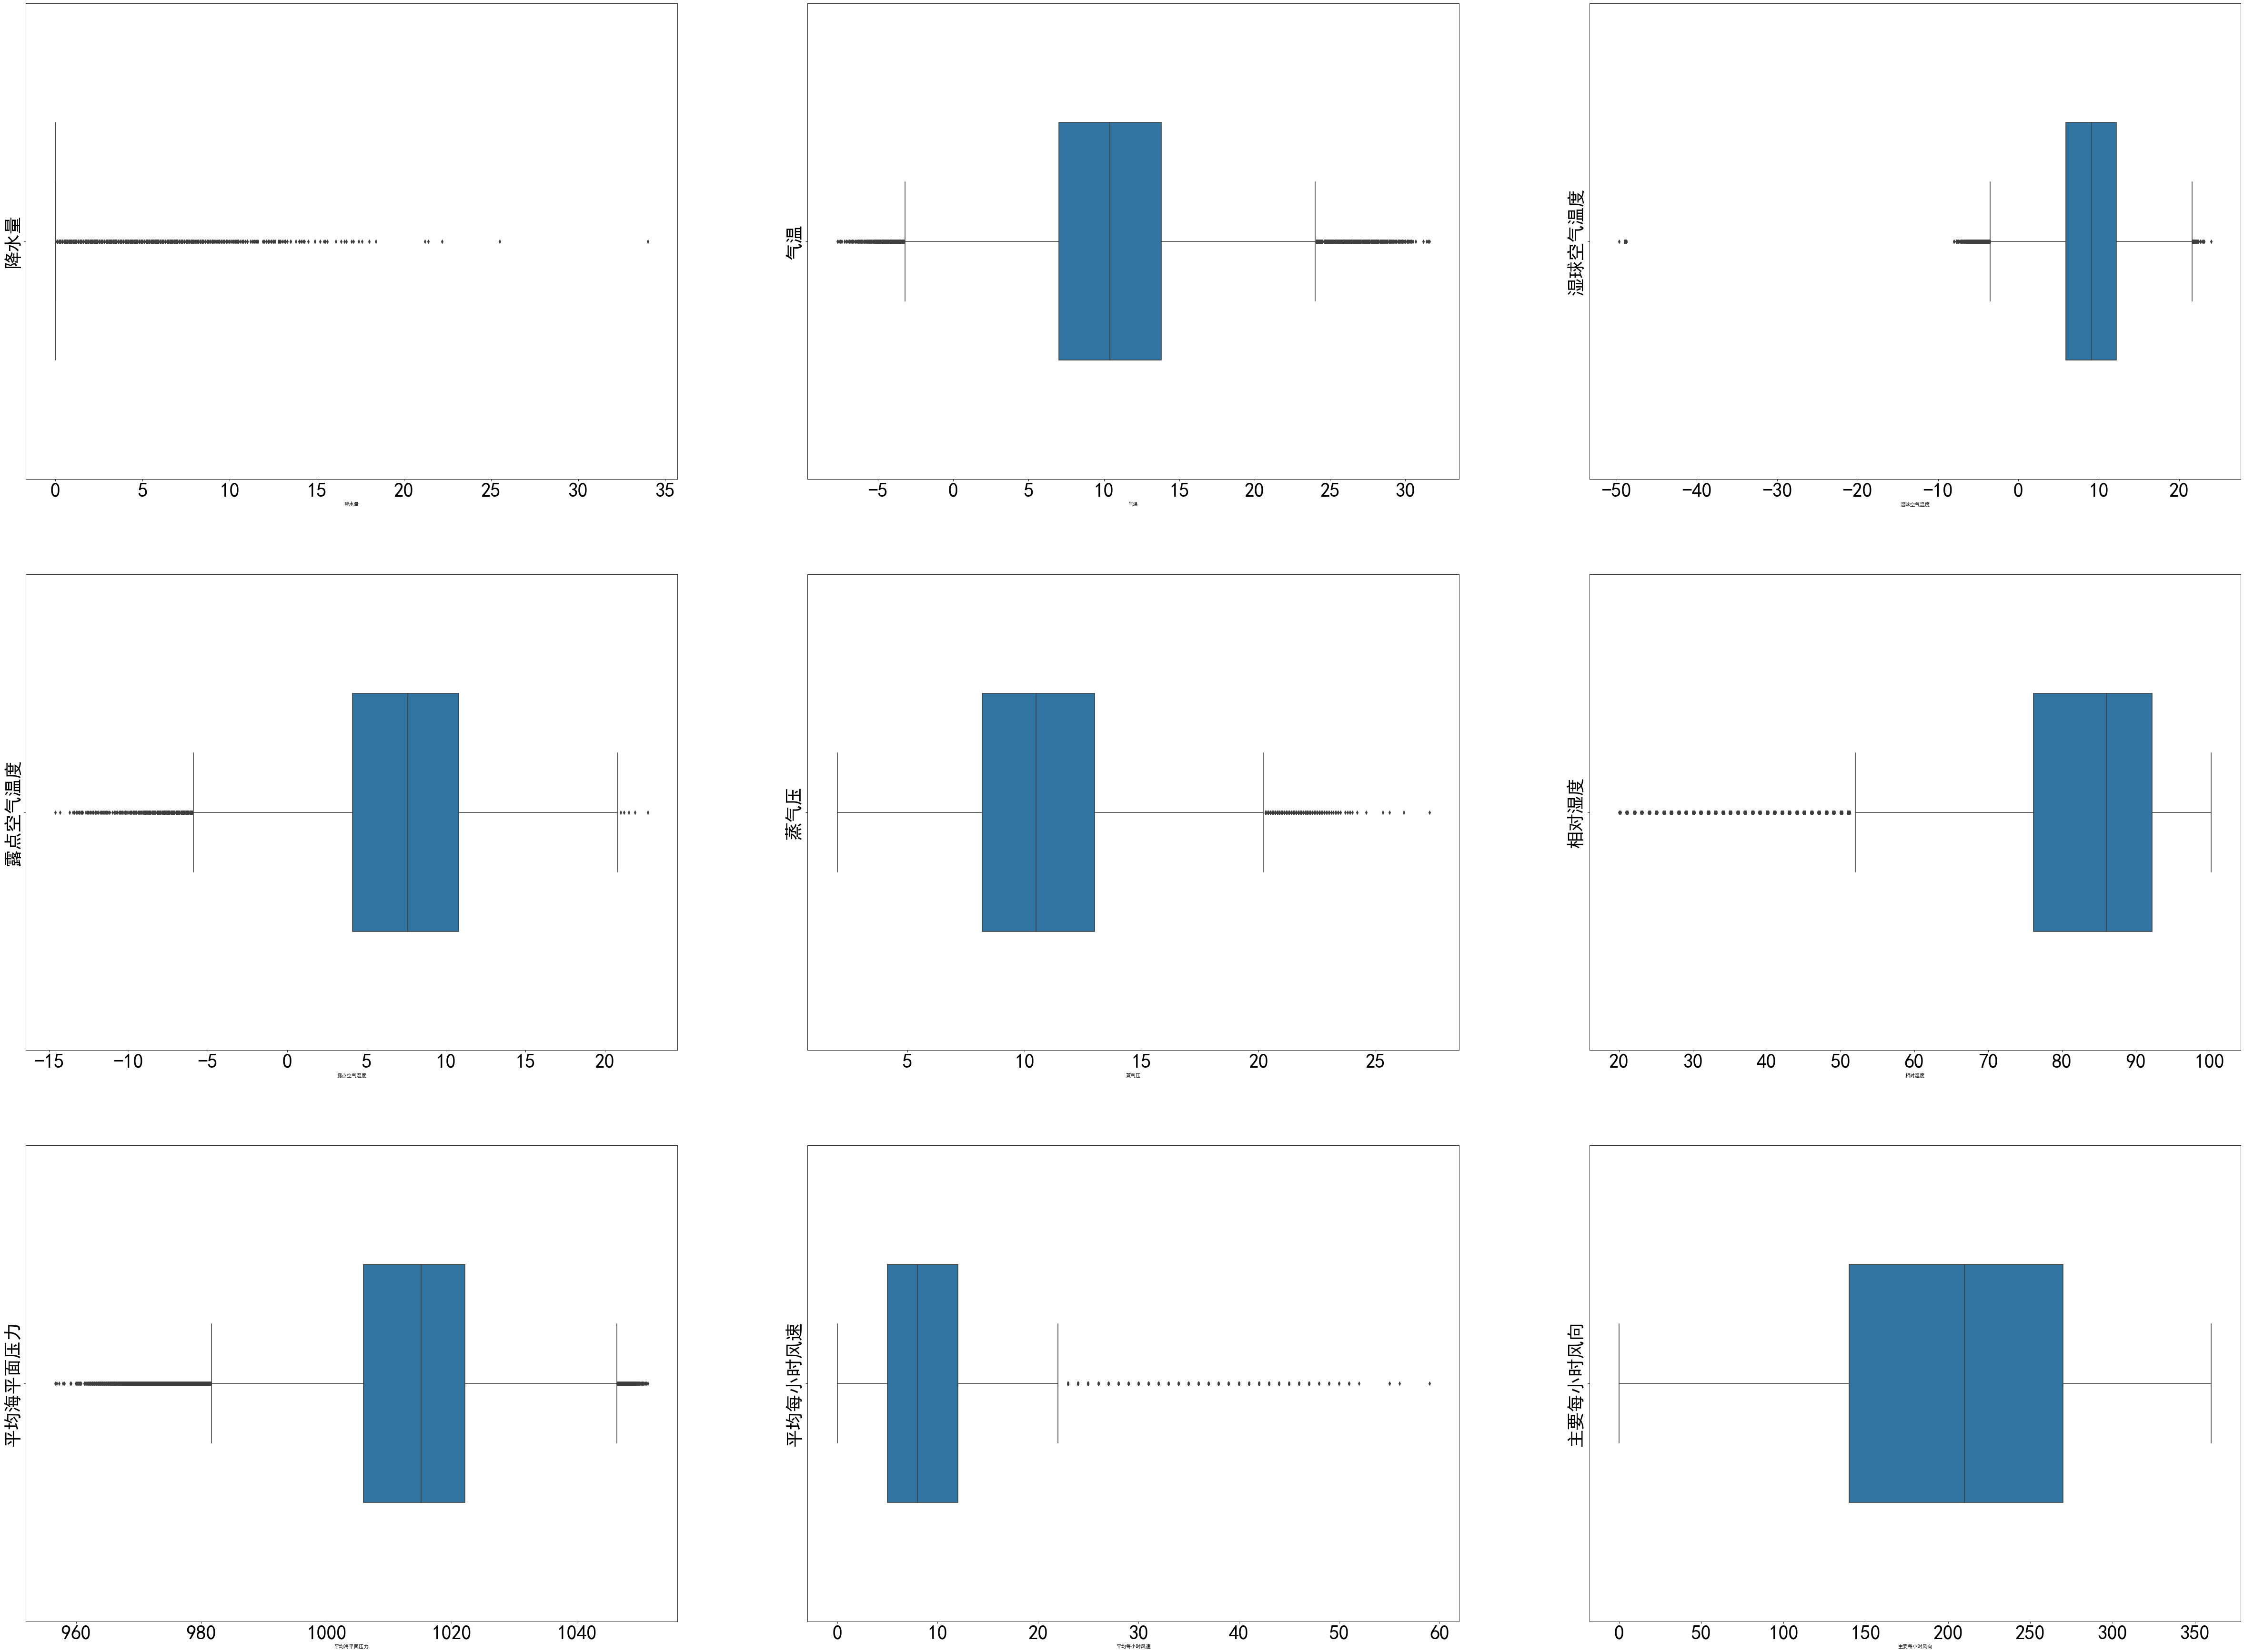

In [28]:
mpl.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）
columns = train.columns.tolist()[:9]  # 列表头
fig = plt.figure(figsize=(80,60), dpi=75)
for i in range(9):
    plt.subplot(3,3,i+1) #7行8列的第i个子图
    sns.boxplot(train[columns[i]], orient="h", width=0.5)  # 箱式图
    plt.ylabel(columns[i], fontsize=36)
    plt.xticks(fontsize=40) 

### 直方图和QQ图——判断是否符合正态分布

In [43]:
train.columns

Index(['降水量', '气温', '湿球空气温度', '露点空气温度', '蒸气压', '相对湿度', '平均海平面压力', '平均每小时风速',
       '主要每小时风向', '地区', '站号', '年', '月', '日'],
      dtype='object')

D:\software\anaconda2022\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\software\anaconda2022\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\software\anaconda2022\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

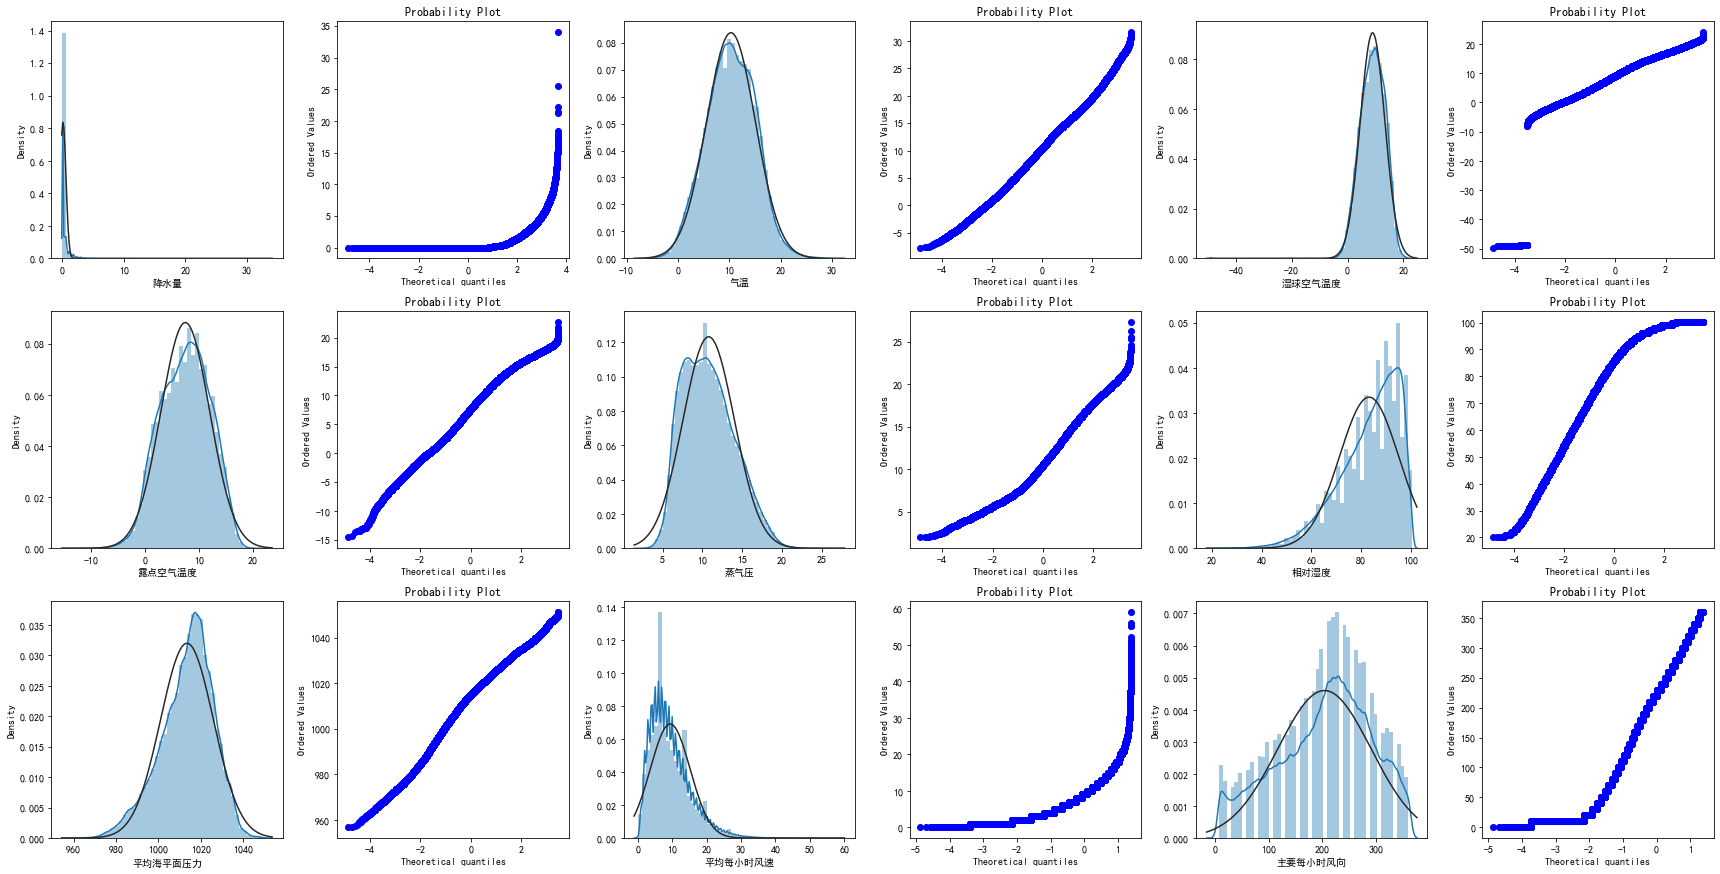

In [42]:
train_cols = 6
train_rows = len(train.columns[:9])
plt.figure(figsize=(4 * train_cols, 4 * train_rows))

i = 0
for col in train.columns[:9]:
    i += 1
    ax = plt.subplot(train_rows, train_cols, i)
    sns.distplot(train[col], fit=stats.norm, color = 'blue')

    i += 1
    ax = plt.subplot(train_rows, train_cols, i)
    res = stats.probplot(train[col], plot=plt, color = 'red')

plt.tight_layout()
plt.show()

### KED图——判断训练集和测试集分布是否一致

In [44]:
test.columns

Index(['降水量', '湿球空气温度', '露点空气温度', '蒸气压', '相对湿度', '平均海平面压力', '平均每小时风速',
       '主要每小时风向', '地区', '站号', '年', '月', '日'],
      dtype='object')

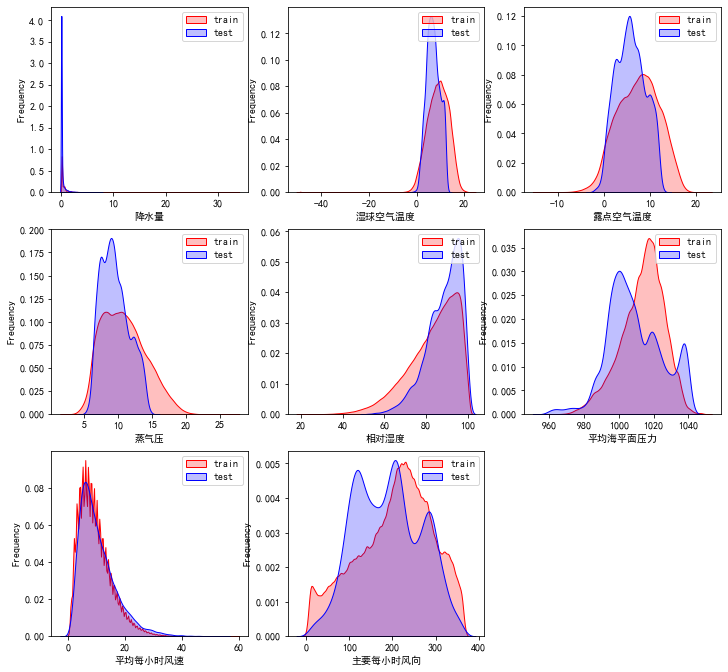

In [46]:
dist_cols = 3
dist_rows = len(test.columns[:8])
plt.figure(figsize=(4 * dist_cols, 4 * dist_rows))

i=1
for col in test.columns[:8]:
    ax = plt.subplot(dist_rows, dist_cols, i)
    ax = sns.kdeplot(train[col], color='Red', shade=True)
    ax = sns.kdeplot(test[col], color='Blue', shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax = ax.legend(['train', 'test'])
    i += 1

plt.show()

### BOX-COX变换——使其符合正态分布

#### 先做归一化，将训练测试数据集合到一起

In [49]:
# 合并训练集和测试集的数据
train_x =  train.drop(['气温'], axis=1)

#data_all=pd.concat([train_data,test_data],axis=0,ignore_index=True)
data_all = pd.concat([train_x,test])
data_all

,降水量,湿球空气温度,露点空气温度,蒸气压,相对湿度,平均海平面压力,平均每小时风速,主要每小时风向,地区,站号,年,月,日
0,0.0,0.8,-0.1,6.2,90.1,1016.3,NaN,NaN,0,0,2016,1,01 00:00:00
1,0.0,0.8,-0.7,6.0,85.0,1016.3,NaN,NaN,0,0,2016,1,01 01:00:00
2,0.0,-0.5,-1.3,5.6,92.2,1016.4,NaN,NaN,0,0,2016,1,01 02:00:00
3,0.0,-1.0,-1.3,5.7,95.0,1016.3,NaN,NaN,0,0,2016,1,01 03:00:00
4,0.0,-0.5,-1.1,5.8,94.1,1016.2,NaN,NaN,0,0,2016,1,01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17851,0.0,10.6,10.4,12.5,96.0,1005.8,11.0,160.0,7,23,2021,12,31 19:00:00
17852,0.0,10.6,10.3,12.4,95.2,1004.9,12.0,150.0,7,23,2021,12,31 20:00:00
17853,0.2,11.0,10.9,13.1,96.0,1003.9,14.0,150.0,7,23,2021,12,31 21:00:00
17854,0.1,11.7,11.3,13.4,98.1,1002.7,13.0,150.0,7,23,2021,12,31 22:00:00


In [50]:
cols_numeric = list(data_all.columns[:7])

def scale_minmax(col):
    return (col - col.min()) / (col.max() - col.min())

data_all[cols_numeric] = data_all[cols_numeric].apply(scale_minmax, axis=0)
data_all[cols_numeric].describe()

,降水量,湿球空气温度,露点空气温度,蒸气压,相对湿度,平均海平面压力,平均每小时风速
count,1.262446e+06,1.262289e+06,1.262289e+06,1.262289e+06,1.262368e+06,1.262261e+06,1.157251e+06
mean,3.722512e-03,7.952801e-01,5.906655e-01,3.469697e-01,7.883821e-01,5.993432e-01,1.598399e-01
std,1.402539e-02,5.969338e-02,1.209331e-01,1.276362e-01,1.481715e-01,1.325997e-01,9.812683e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,7.530529e-01,5.013405e-01,2.450593e-01,6.995012e-01,5.179704e-01,8.474576e-02
50%,0.000000e+00,7.978290e-01,5.951743e-01,3.359684e-01,8.229426e-01,6.162791e-01,1.355932e-01
75%,0.000000e+00,8.398915e-01,6.809651e-01,4.347826e-01,9.102244e-01,6.913319e-01,2.033898e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


D:\software\anaconda2022\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\software\anaconda2022\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\software\anaconda2022\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

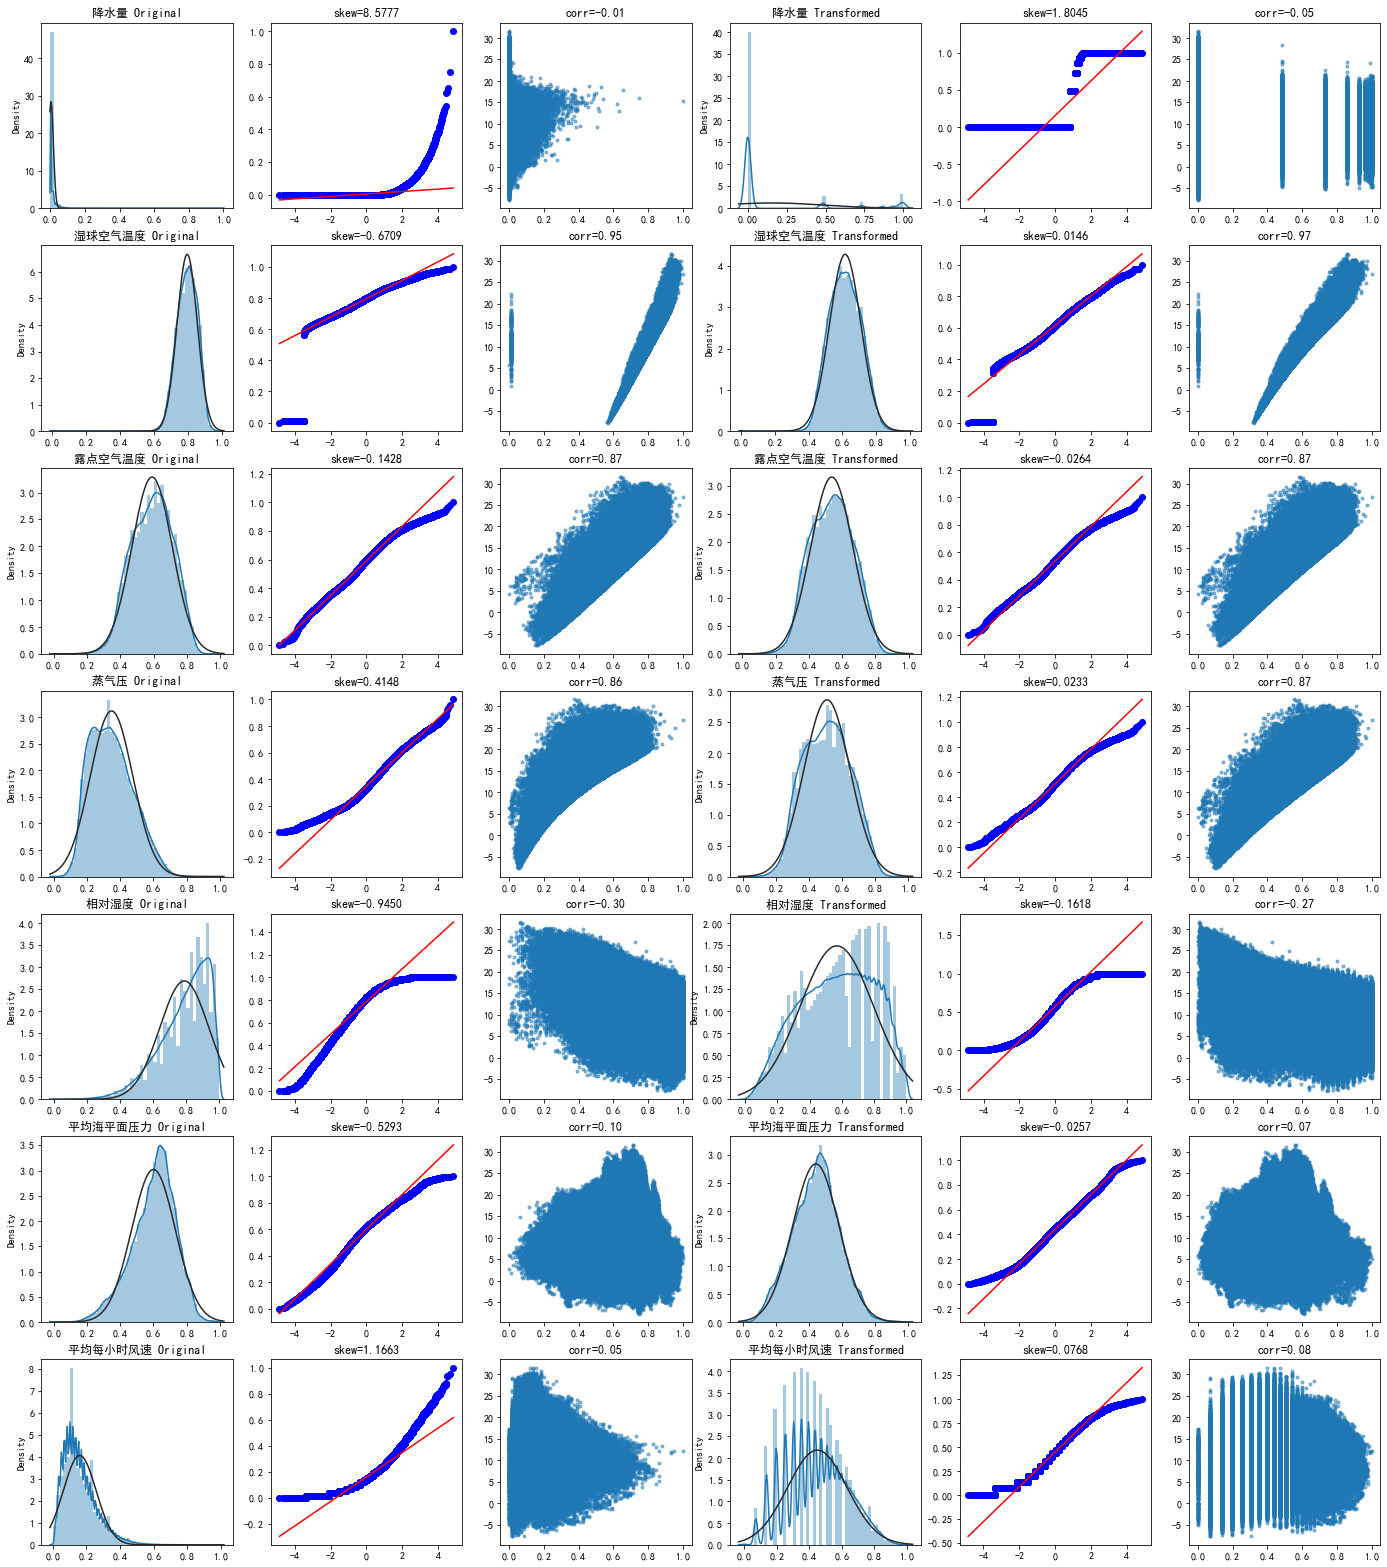

In [58]:
# 训练数据做box-cox变换
train_data_process = train[cols_numeric]
train_data_process = train_data_process[cols_numeric].apply(scale_minmax, axis=0)

## Check effect of Box-Cox transforms on distributions of continuous variables
train_data_process = pd.concat([train_data_process, train['气温']], axis=1)

fcols = 6
frows = len(cols_numeric)
plt.figure(figsize=(4 * fcols, 4 * frows))
i = 0

for var in cols_numeric:
    dat = train_data_process[[var, '气温']].dropna()

    i += 1
    plt.subplot(frows, fcols, i)
    sns.distplot(dat[var], fit=stats.norm);
    plt.title(var + ' Original')
    plt.xlabel('')

    i += 1
    plt.subplot(frows, fcols, i)
    _ = stats.probplot(dat[var], plot=plt)
    plt.title('skew=' + '{:.4f}'.format(stats.skew(dat[var])))  #计算数据集的偏度
    plt.xlabel('')
    plt.ylabel('')

    i += 1
    plt.subplot(frows, fcols, i)
    plt.plot(dat[var], dat['气温'], '.', alpha=0.5)
    plt.title('corr=' + '{:.2f}'.format(np.corrcoef(dat[var], dat['气温'])[0][1]))

    i += 1
    plt.subplot(frows, fcols, i)
    trans_var, lambda_var = stats.boxcox(dat[var].dropna() + 1)
    trans_var = scale_minmax(trans_var)  # 数据归一化
    sns.distplot(trans_var, fit=stats.norm);
    plt.title(var + ' Transformed')
    plt.xlabel('')

    i += 1
    plt.subplot(frows, fcols, i)
    _ = stats.probplot(trans_var, plot=plt)
    plt.title('skew=' + '{:.4f}'.format(stats.skew(trans_var)))  #归一化后，偏度明显变小，相关性变化不大
    plt.xlabel('')
    plt.ylabel('')

    i += 1
    plt.subplot(frows, fcols, i)
    plt.plot(trans_var, dat['气温'], '.', alpha=0.5)
    plt.title('corr=' + '{:.2f}'.format(np.corrcoef(trans_var, dat['气温'])[0][1]))

## 特征工程

In [63]:
train['时间'] = train['年'].map(str)+"/"+train['月'].map(str)+"/"+train['日'].map(str)
train['时间'] = pd.to_datetime(train['时间'])
train.drop(labels=['年', '月', '日'], axis=1)

,降水量,气温,湿球空气温度,露点空气温度,蒸气压,相对湿度,平均海平面压力,平均每小时风速,主要每小时风向,地区,站号,时间
0,0.0,1.4,0.8,-0.1,6.2,90.1,1016.3,NaN,NaN,0,0,2016-01-01 00:00:00
1,0.0,1.6,0.8,-0.7,6.0,85.0,1016.3,NaN,NaN,0,0,2016-01-01 01:00:00
2,0.0,-0.2,-0.5,-1.3,5.6,92.2,1016.4,NaN,NaN,0,0,2016-01-01 02:00:00
3,0.0,-0.5,-1.0,-1.3,5.7,95.0,1016.3,NaN,NaN,0,0,2016-01-01 03:00:00
4,0.0,-0.3,-0.5,-1.1,5.8,94.1,1016.2,NaN,NaN,0,0,2016-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1244731,0.1,8.9,8.6,8.6,11.2,97.2,1000.9,15.0,290.0,7,23,2021-11-30 19:00:00
1244732,0.5,8.8,8.4,8.1,10.8,96.1,1001.2,19.0,300.0,7,23,2021-11-30 20:00:00
1244733,0.3,7.9,7.5,6.9,10.1,94.2,1002.3,19.0,320.0,7,23,2021-11-30 21:00:00
1244734,0.2,7.3,6.8,6.4,9.8,94.0,1003.6,18.0,310.0,7,23,2021-11-30 22:00:00


In [65]:
def get_feature1(df1):
    df1['date'] = df1['时间'].dt.date 
    df1['day'] = df1['时间'].dt.day
    df1['hour_of_day'] = df1['时间'].dt.hour
    df1['minute_of_day'] = df1['时间'].dt.minute
    df1['month_of_year'] = df1['时间'].dt.month
    df1['time'] = df1['时间'].dt.time
    df1['quarter'] = df1['时间'].dt.quarter
    df1['day_of_year'] = df1['时间'].dt.dayofyear
    df1['day_of_week'] = df1['时间'].dt.dayofweek #星期中的哪一天

In [66]:
get_feature1(train)

D:\software\anaconda2022\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38477 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\software\anaconda2022\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\software\anaconda2022\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\software\anaconda2022\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\software\anaconda2022\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 28201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\software\anaconda2022\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 28287 missing from c

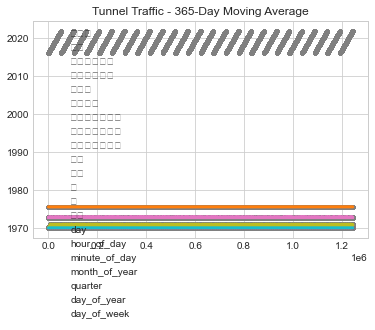

In [80]:
moving_average = train[''].rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = train.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Tunnel Traffic - 365-Day Moving Average", legend=False,
)

## test

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17856 entries, 0 to 17855
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   降水量      17856 non-null  float64
 1   湿球空气温度   17856 non-null  float64
 2   露点空气温度   17856 non-null  float64
 3   蒸气压      17856 non-null  float64
 4   相对湿度     17856 non-null  float64
 5   平均海平面压力  17856 non-null  float64
 6   平均每小时风速  16368 non-null  float64
 7   主要每小时风向  16368 non-null  float64
 8   地区       17856 non-null  int64  
 9   站号       17856 non-null  int64  
 10  年        17856 non-null  int64  
 11  月        17856 non-null  int64  
 12  日        17856 non-null  object 
dtypes: float64(8), int64(4), object(1)
memory usage: 1.8+ MB


In [16]:
display(test.describe())
display(test.describe(include="object"))

,降水量,湿球空气温度,露点空气温度,蒸气压,相对湿度,平均海平面压力,平均每小时风速,主要每小时风向,地区,站号,年,月
count,17856.000000,17856.000000,17856.000000,17856.000000,17856.000000,17856.000000,16368.000000,16368.000000,17856.000000,17856.00000,17856.0,17856.0
mean,0.162086,6.875442,5.852744,9.487349,88.368268,1009.079139,10.401882,189.188050,6.208333,11.50000,2021.0,12.0
std,0.519729,2.796746,3.151836,2.061641,8.237892,15.910269,6.550929,76.527124,4.112892,6.92238,0.0,0.0
min,0.000000,-1.800000,-2.500000,5.000000,52.000000,957.200000,0.000000,10.000000,0.000000,0.00000,2021.0,12.0
25%,0.000000,4.800000,3.400000,7.800000,83.200000,998.000000,6.000000,130.000000,3.750000,5.75000,2021.0,12.0
50%,0.000000,6.700000,5.700000,9.200000,90.100000,1006.600000,9.000000,190.000000,6.500000,11.50000,2021.0,12.0
75%,0.100000,8.900000,8.200000,10.900000,95.000000,1020.100000,14.000000,250.000000,9.250000,17.25000,2021.0,12.0
max,7.700000,13.500000,13.300000,15.200000,100.200000,1041.300000,54.000000,360.000000,14.000000,23.00000,2021.0,12.0


,日
count,17856
unique,744
top,01 00:00:00
freq,24
